In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import math
import pickle
import numpy as np
from collections import Counter

In [7]:
filename = "processed_general.pickle"
with open(filename, mode="rb") as f:
    dataset = pickle.load(f)
inputs = dataset["inputs"]
targets = dataset["labels"]
inputs[0], targets[0]

(' Rela~ no   M. ,   Peimbert   M. ,   Beckman   J. ,   2002 ,   ApJ ,   564 ,   704 ',
 [{'start': 0, 'end': 10, 'label': 'authors', 'text': ' Rela~ no '},
  {'start': 11, 'end': 17, 'label': 'authors', 'text': ' M. , '},
  {'start': 18, 'end': 28, 'label': 'authors', 'text': ' Peimbert '},
  {'start': 29, 'end': 35, 'label': 'authors', 'text': ' M. , '},
  {'start': 36, 'end': 45, 'label': 'authors', 'text': ' Beckman '},
  {'start': 46, 'end': 52, 'label': 'authors', 'text': ' J. , '},
  {'start': 53, 'end': 61, 'label': 'venue', 'text': ' 2002 , '},
  {'start': 62, 'end': 69, 'label': 'venue', 'text': ' ApJ , '},
  {'start': 70, 'end': 77, 'label': 'venue', 'text': ' 564 , '},
  {'start': 78, 'end': 83, 'label': 'venue', 'text': ' 704 '}])

Average Length: 142.16680096696211
Median Length: 133.5


(array([348., 716., 672., 442., 196.,  63.,  28.,   6.,   2.,   4.,   0.,
          1.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([ 38.  ,  80.65, 123.3 , 165.95, 208.6 , 251.25, 293.9 , 336.55,
        379.2 , 421.85, 464.5 , 507.15, 549.8 , 592.45, 635.1 , 677.75,
        720.4 , 763.05, 805.7 , 848.35, 891.  ]),
 <BarContainer object of 20 artists>)

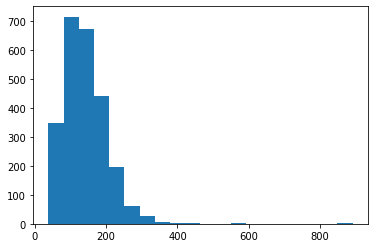

In [8]:
lens = [len(i) for i in inputs]
avg_len = sum(lens) / len(lens)
print(f"Average Length: {avg_len}")
median_len = np.median(lens)
print(f"Median Length: {median_len}")
fig, ax = plt.subplots()
ax.hist(lens, bins=20)

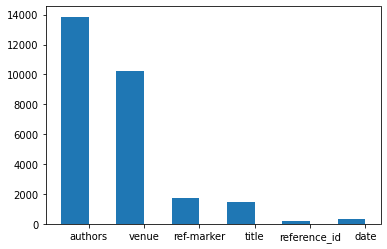

In [9]:
labels = [l["label"] for ls in targets for l in ls]
counts = Counter(labels)
labels, values = zip(*counts.items())
indexes = np.arange(len(labels))
width = 0.5
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [11]:
dates = []
for labels in targets:
    _dates = [l["text"] for l in labels if l["label"] == "date"]
    if len(_dates) > 0:
        dates.append(_dates)

In [12]:
dates

[[' (2006d) . '],
 [' (1992) . '],
 [' (1989) . '],
 [' (1977) , '],
 [' (2005) . '],
 [' (1999) . '],
 [' (1991) . '],
 [' (1999) . '],
 [' (2001) . '],
 [' (2003) . '],
 [' (1958) . '],
 [' (2007) . '],
 [' (2008) . '],
 [' (1996) '],
 [' (2003) . '],
 [' (1999) . '],
 [' (1996) . '],
 [' (2007) . '],
 [' (2007a) . '],
 [' (1996) . '],
 [' (2008) . '],
 [' (2007) . '],
 [' 1997 , '],
 [' (1985) '],
 [' (2007) '],
 [' (1962) . '],
 [' (1986) . '],
 [' (2003) . '],
 [' (1999) . '],
 [' (2006) . '],
 [' (2000) '],
 [' 1964 . '],
 [' (2008) . '],
 [' (2006) . '],
 [' (2007) . '],
 [' (2006a) . '],
 [' (2003) . '],
 [' (1999) . '],
 [' (1999) '],
 [' 2000 , '],
 [' (2000) . '],
 [' (2006) . '],
 [' (2005) . '],
 [' (2007) . '],
 [' (2004) . '],
 [' (1990) . '],
 [' 1974 , '],
 [' (2007b) . '],
 [' (1991) . '],
 [' (1987) . '],
 [' (1994) . '],
 [' (2008) . '],
 [' (2006c) . '],
 [' (1989) . '],
 [' (2001) . '],
 [' (2008) . '],
 [' (2007) . '],
 [' (1982) . '],
 [' (1998) . '],
 [' (1991)